In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [148]:
data = pd.read_csv('Churn_Modelling.csv')


In [150]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Descriptive Statistics

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [70]:
data.describe(include='object').T # THIS WILL GIVES US A BRIEF INTRODUCTION OF DATA

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


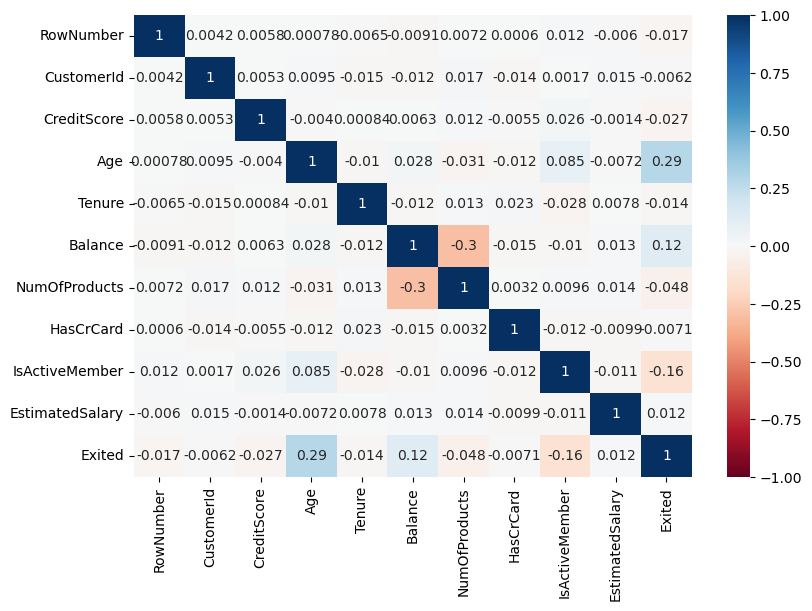

In [71]:
# Explore the correlation among numerical columns
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(numeric_only=True),vmin=-1,annot=True,cmap='RdBu')
plt.show()

## Univariate Analysis

In [73]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [74]:
num_cols = ['CreditScore','Age', 'Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited','Tenure']

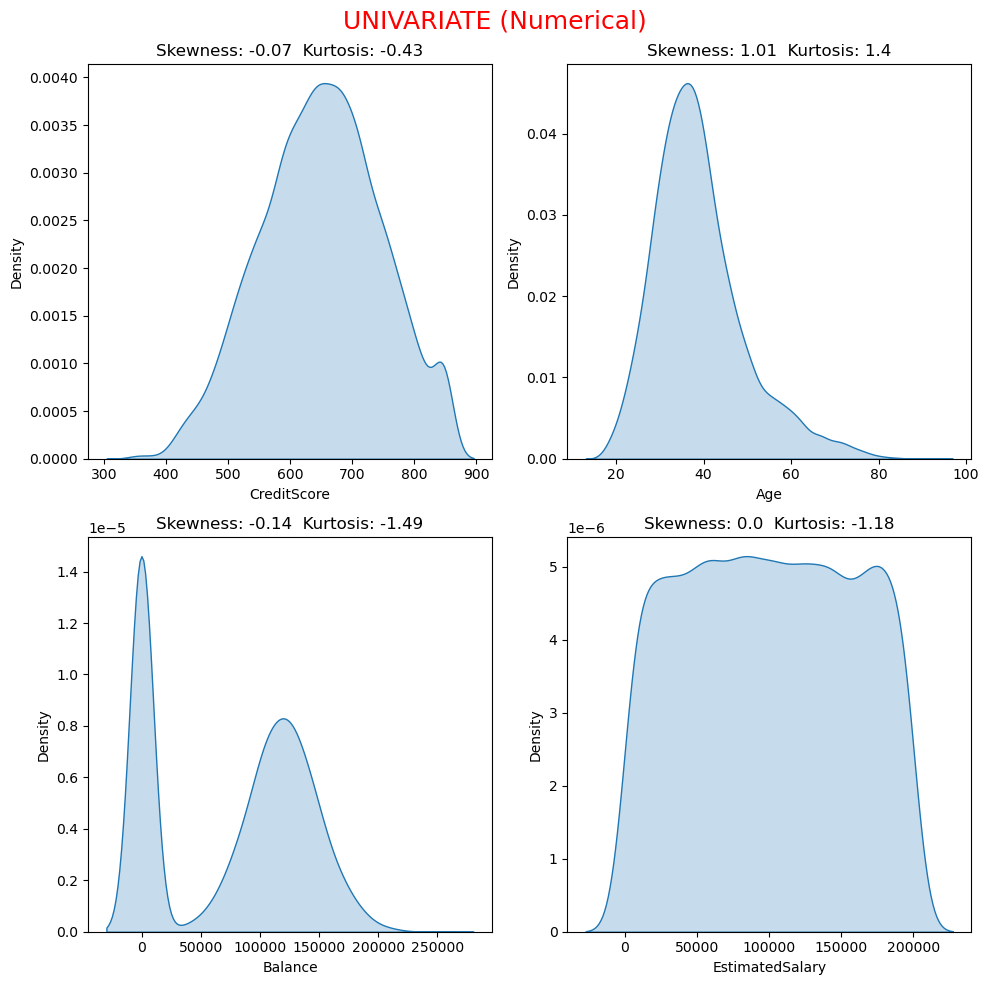

In [75]:
# Num Columns

# Explore the numrical columns

t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    s,k = data[i].skew(),data[i].kurt()
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)}  Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

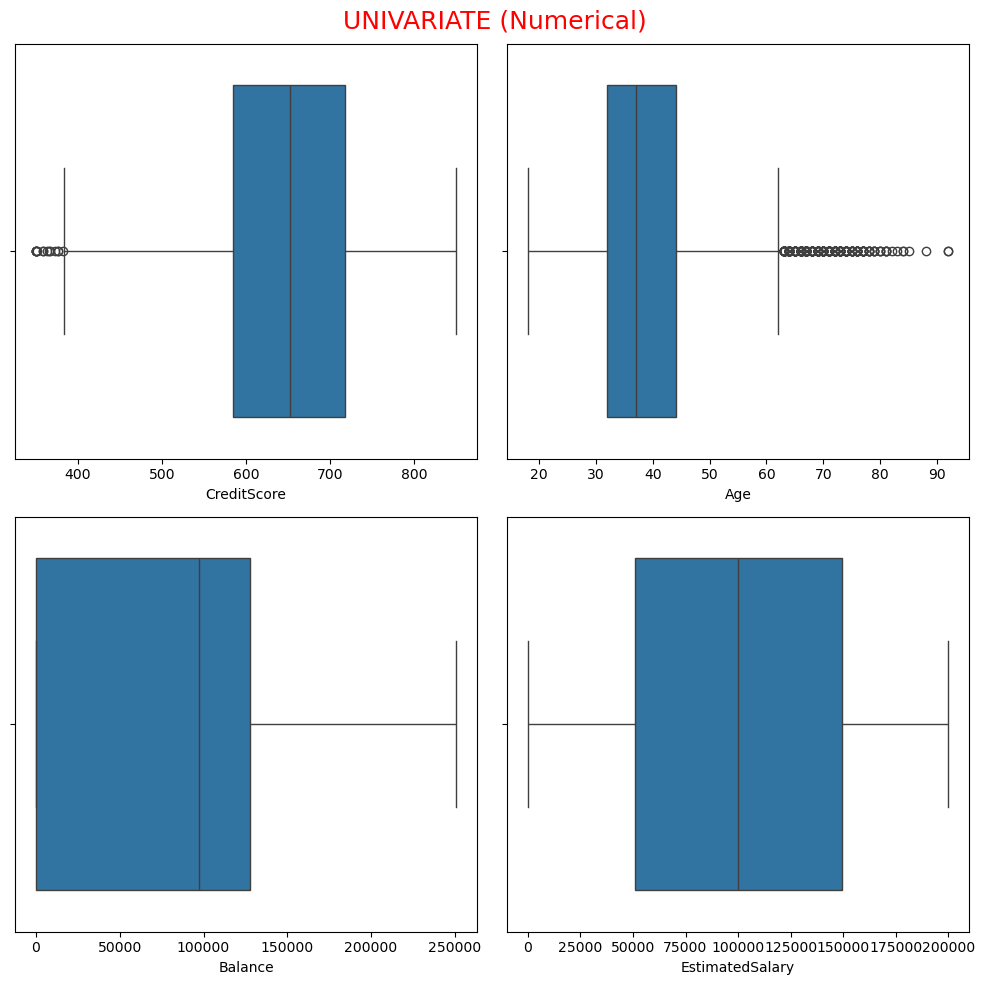

In [76]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

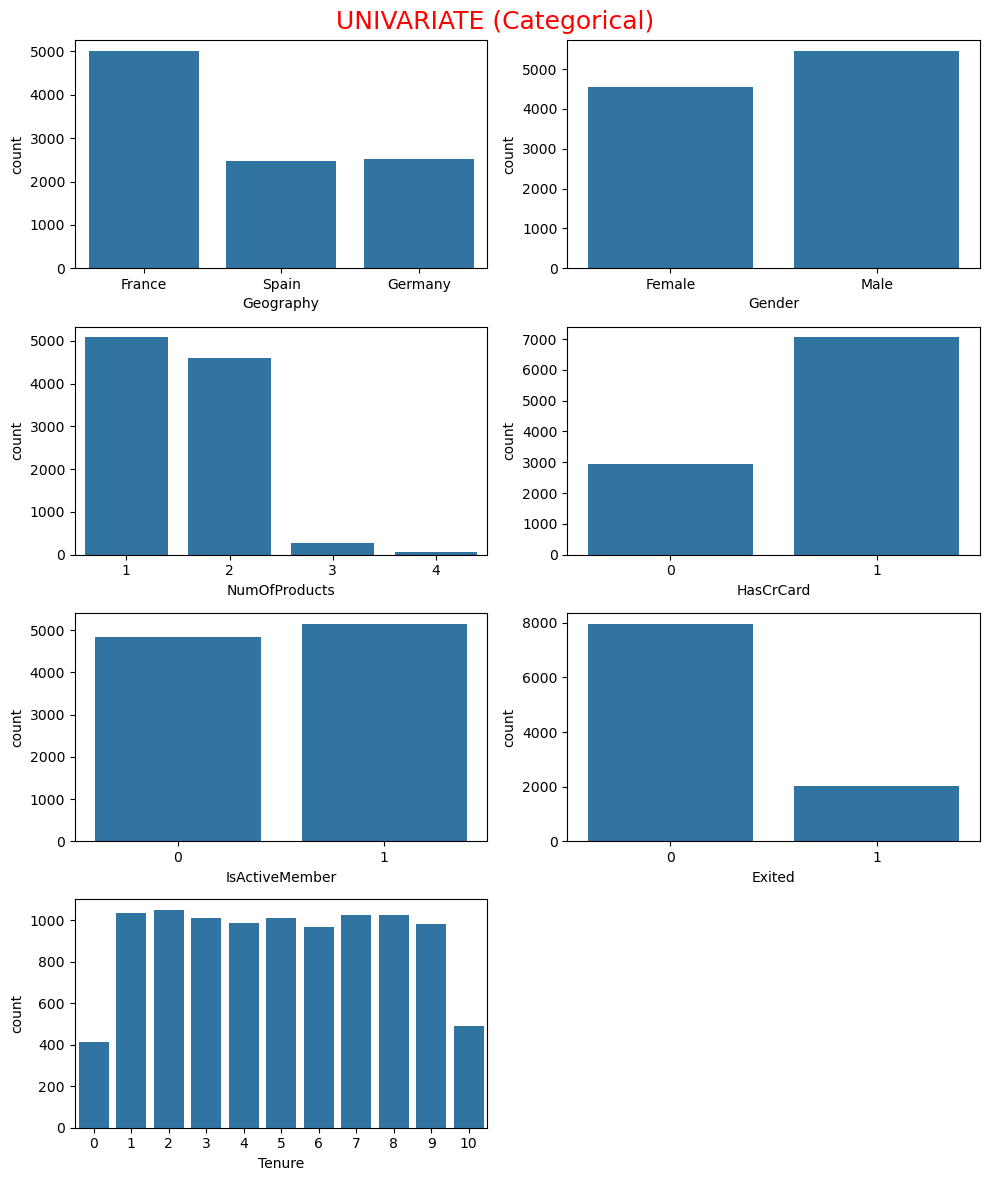

In [77]:
# Explore the Categorical columns

t=1
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE (Categorical)',color='red',size=18)
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

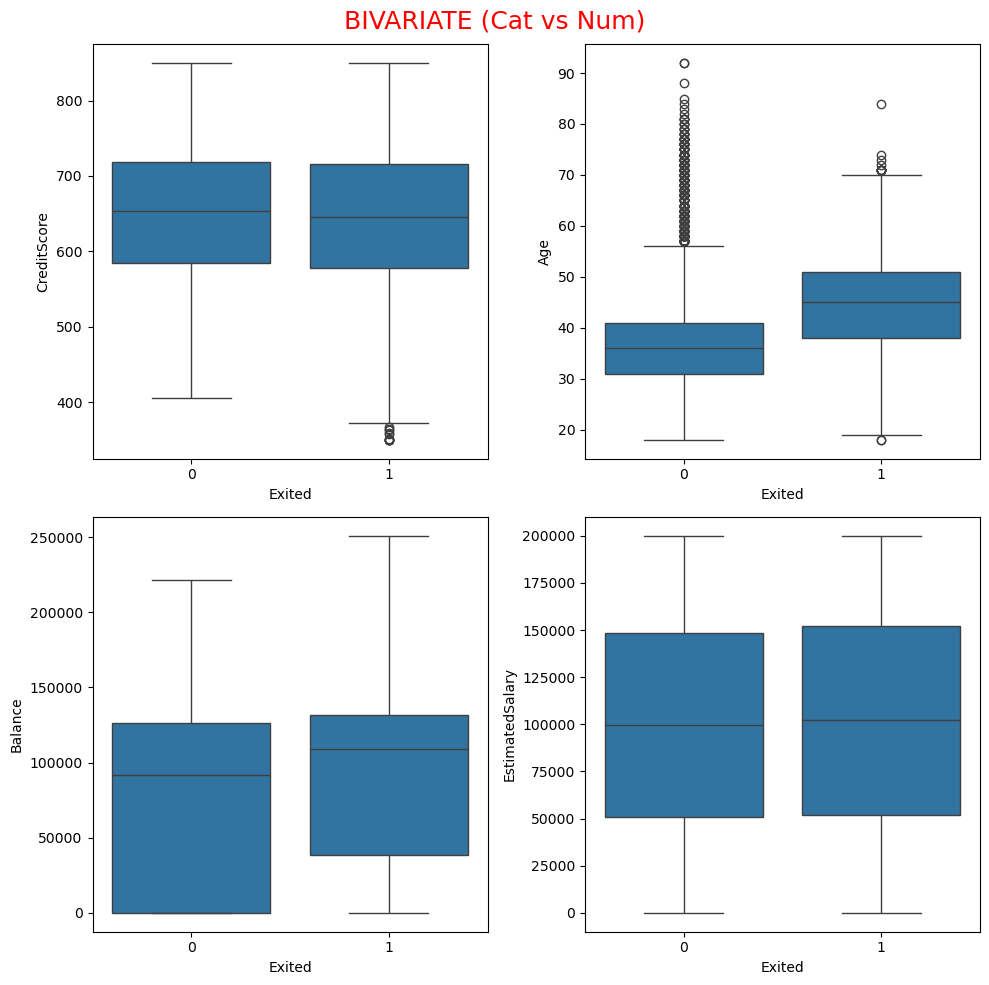

In [79]:
# Cat vs Num
t=1
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,y=i,x='Exited')
    t+=1
plt.tight_layout()
plt.show()

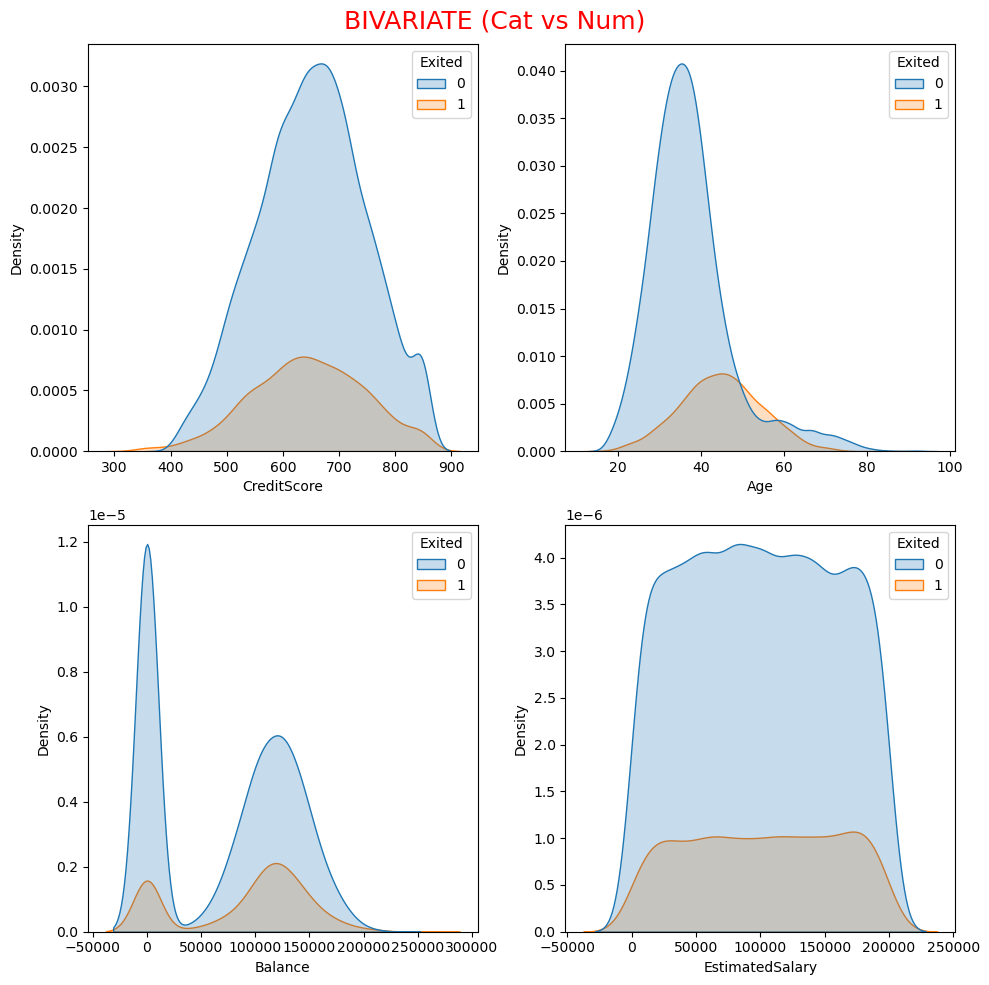

In [80]:
# Cat vs Num
t=1
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,hue='Exited',fill=True)
    t+=1
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

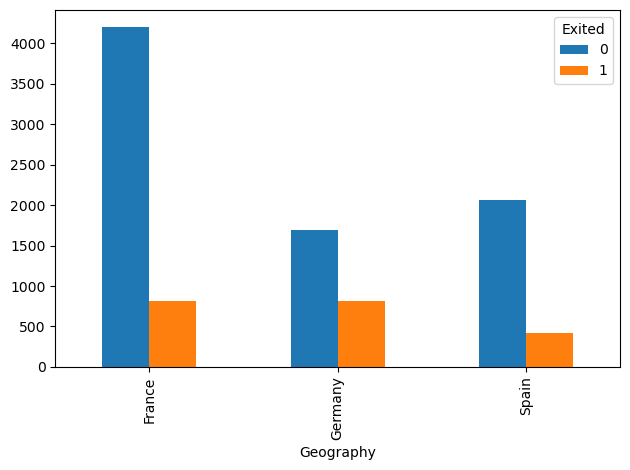

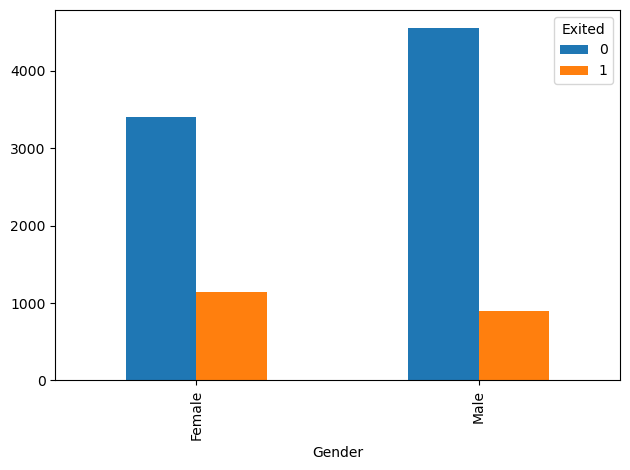

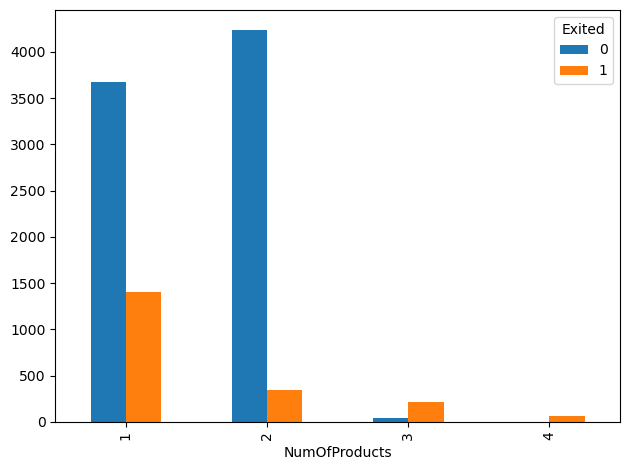

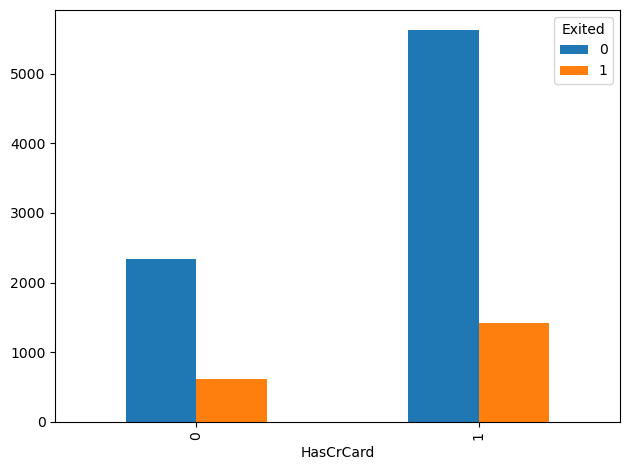

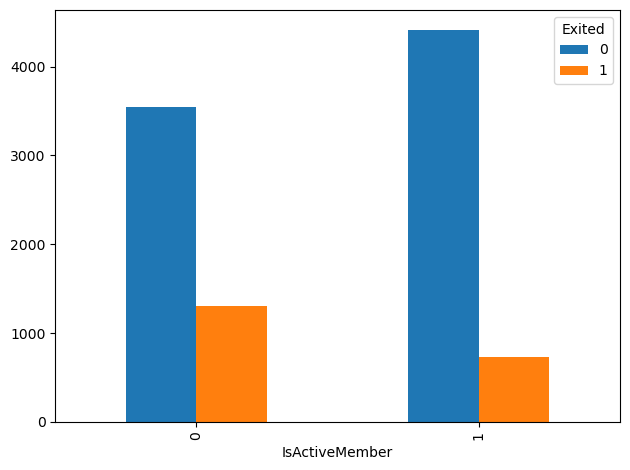

<Figure size 640x480 with 0 Axes>

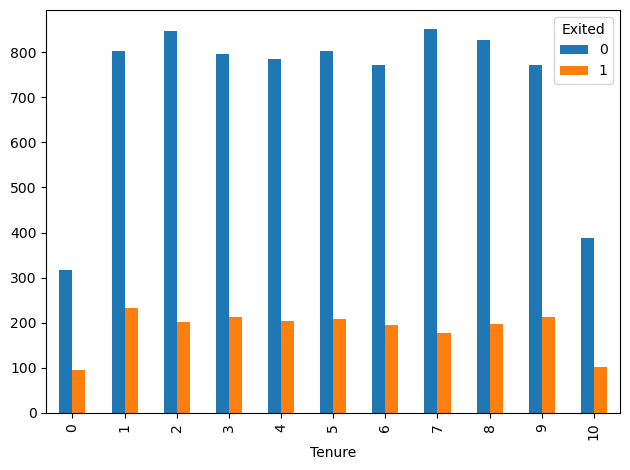

In [81]:
# cat vs cat

plt.figure(figsize=(10,10))
for i in cat_cols:
    if i != 'Exited':
        pd.crosstab(data[i],data['Exited']).plot(kind='bar')
    plt.tight_layout()
    plt.show()
        

## Multivaraite Analysis

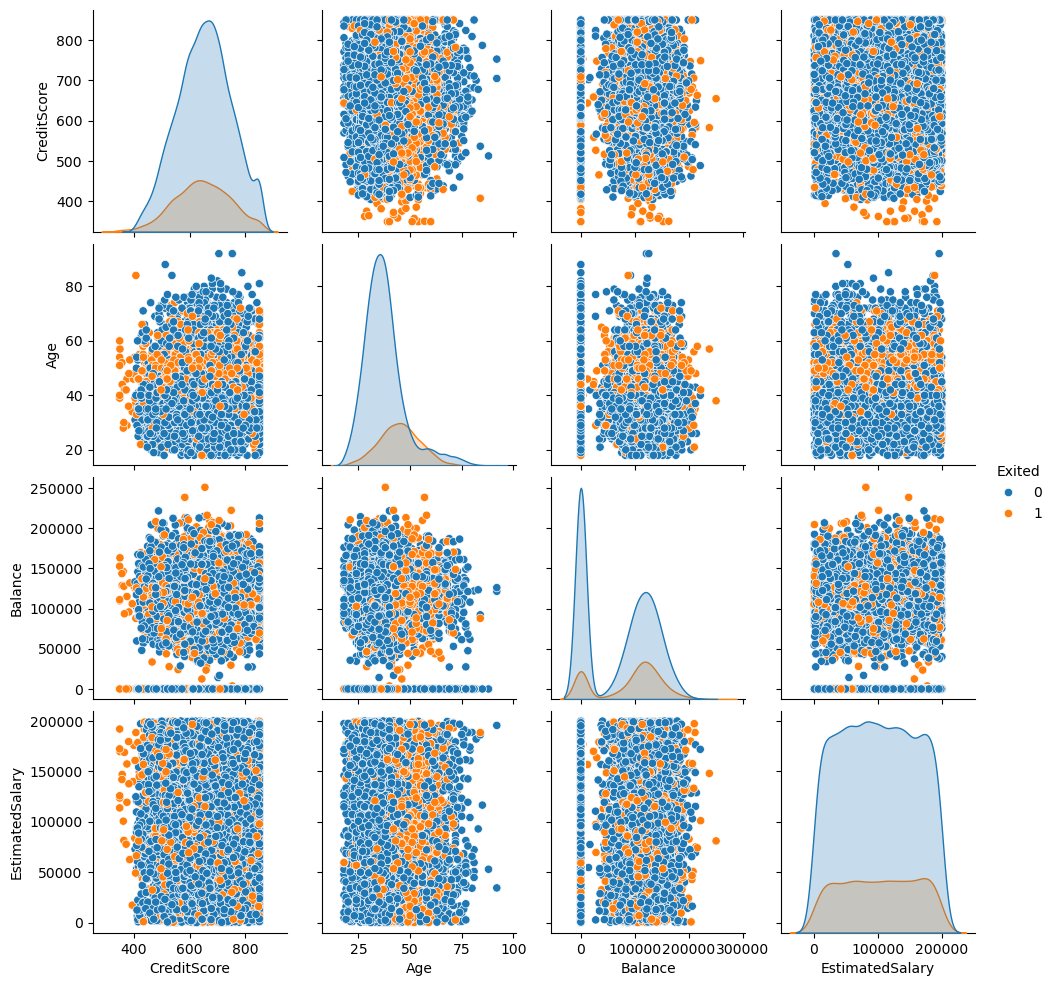

In [83]:
sns.pairplot(data=data,x_vars=num_cols,y_vars=num_cols,hue='Exited')
plt.show()

## DATA PREPROCESSING

In [85]:
data.drop(columns = ['RowNumber','Surname'], inplace = True)

In [86]:
data.set_index('CustomerId', inplace = True)

In [87]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [88]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## OUTLIER TREATMENT

In [90]:
## CAP THE OUTLIERS USING IQR METHOD
for i in num_cols:
    q3,q1 = data[i].quantile([0.75,0.25])
    iqr = q3 -q1
    ul,ll = q3 + 1.5 * iqr, q1 - 1.5*iqr
    data[i] = data[i].apply(lambda x: ul if x > ul else ll if x < ll else x)

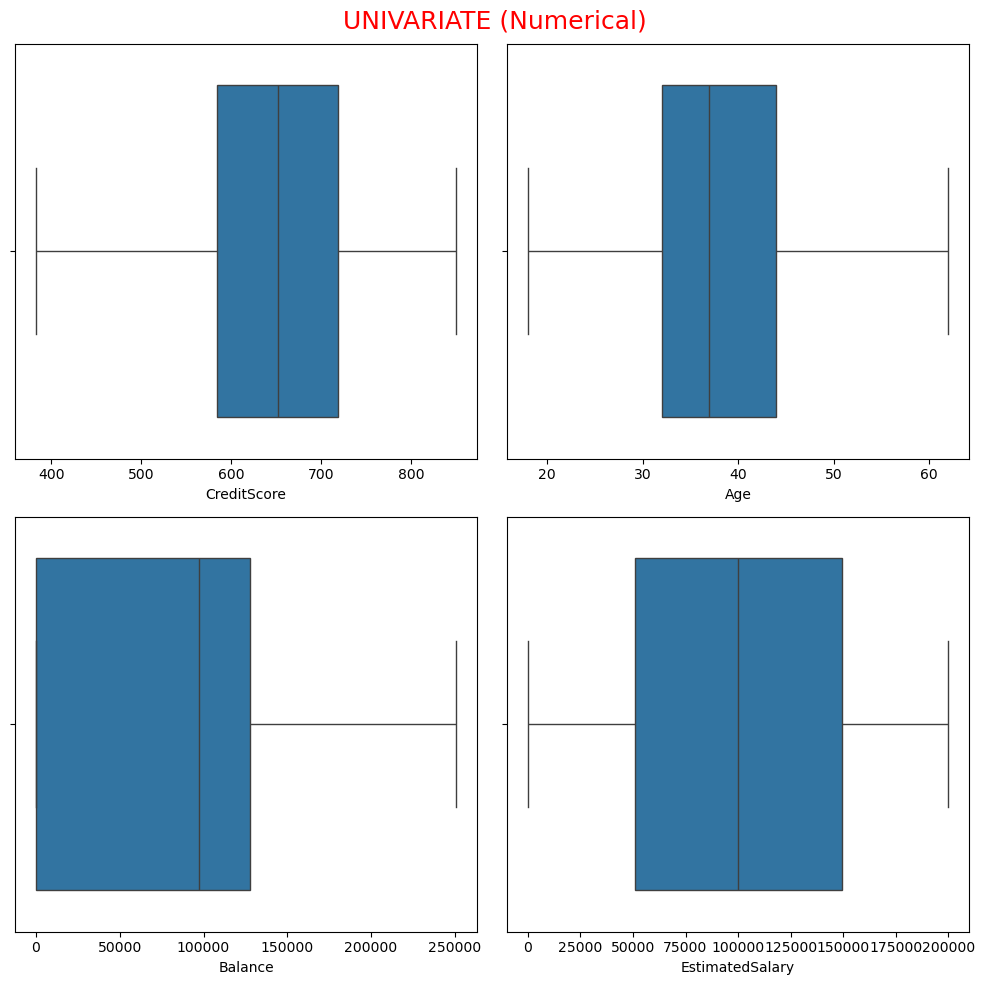

In [91]:
# CHECK IF CAPPING IS DONE
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [92]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,


## FEATURE ENGINEERING

### ENCODING

In [95]:
# n-1 dummy encoding

data = pd.get_dummies(data = data, columns = ['Gender'], drop_first= True, dtype= int)

In [96]:
data

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
CustomerId,,,,,,,,,,,
15634602,619.0,France,42.0,2,0.00,1,1,1,101348.88,1,0
15647311,608.0,Spain,41.0,1,83807.86,1,0,1,112542.58,0,0
15619304,502.0,France,42.0,8,159660.80,3,1,0,113931.57,1,0
15701354,699.0,France,39.0,1,0.00,2,0,0,93826.63,0,0
15737888,850.0,Spain,43.0,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771.0,France,39.0,5,0.00,2,1,0,96270.64,0,1
15569892,516.0,France,35.0,10,57369.61,1,1,1,101699.77,0,1
15584532,709.0,France,36.0,7,0.00,1,0,1,42085.58,1,0


In [97]:
map_dic = round(data.groupby(by = 'Geography')['Exited'].mean(),2).to_dict()

In [98]:
data['Geography'] = data['Geography'].map(map_dic)

In [99]:
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
CustomerId,,,,,,,,,,,
15634602,619.0,0.16,42.0,2,0.00,1,1,1,101348.88,1,0
15647311,608.0,0.17,41.0,1,83807.86,1,0,1,112542.58,0,0
15619304,502.0,0.16,42.0,8,159660.80,3,1,0,113931.57,1,0
15701354,699.0,0.16,39.0,1,0.00,2,0,0,93826.63,0,0
15737888,850.0,0.17,43.0,2,125510.82,1,1,1,79084.10,0,0


## FEATURE SCALlING

In [101]:
scaler = StandardScaler()

In [102]:
scaled_data = scaler.fit_transform(data[num_cols])

In [103]:
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
CustomerId,,,,,,,,,,,
15634602,619.0,0.16,42.0,2,0.00,1,1,1,101348.88,1,0
15647311,608.0,0.17,41.0,1,83807.86,1,0,1,112542.58,0,0
15619304,502.0,0.16,42.0,8,159660.80,3,1,0,113931.57,1,0
15701354,699.0,0.16,39.0,1,0.00,2,0,0,93826.63,0,0
15737888,850.0,0.17,43.0,2,125510.82,1,1,1,79084.10,0,0


### FEATURE TRANSFORMATION

In [105]:
for i in num_cols:
    print(i, data[i].skew())

CreditScore -0.06425547313963796
Age 0.630314700010664
Balance -0.14110871094154384
EstimatedSalary 0.0020853576615585162


In [106]:
pt = PowerTransformer(standardize = False)
data['Age'] = pt.fit_transform(data[['Age']])

In [107]:
for i in num_cols:
    print(i, data[i].skew())

CreditScore -0.06425547313963796
Age 0.0003070254081455418
Balance -0.14110871094154384
EstimatedSalary 0.0020853576615585162


In [108]:
pt.lambdas_ # These lambda values are estimated during the fitting process and determine the power of the transformation applied.

array([-0.02008011])